# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [20]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

image_index = 1 # pick a specific image
image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Visualise data

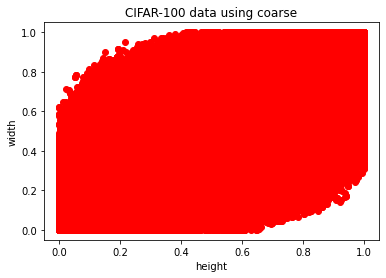

In [21]:
plt.scatter(images[:,0], images[:,1], color="r", marker="o")
#plt.scatter(test_images[:,0], test_images[:,1], color="b", marker='v')

# Add title and axis names
plt.title('CIFAR-100 data using coarse')
plt.xlabel('height')
plt.ylabel('width')
plt.show()

# CNN

### Normalise the data

In [22]:
images = np.divide(images, 255)

## Expland the data to include a channel dimension for CNN. As images are greyscale add one additional axis in the last dimension of our data

In [25]:
print(images.shape)
images_reshaped = np.transpose(images, (3, 0, 1, 2))

print(images_reshaped.shape)
#images = np.expand_dims(images, axis=(4))
#print(images.shape)

(50000, 32, 32, 3)


### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_reshaped, label_fine, epochs=10, 
                    validation_data=(test_images, test_label_fine))

Epoch 1/10


InvalidArgumentError:  Received a label value of 92 which is outside the valid range of [0, 10).  Label values: 49 62 23 10 92 92 71 51 53 58 39 2 6 16 46 46 70 70 2 14 24 8 56 19 78 79 67 69 5 45 19 8
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-28-ffaf2121415b>:9) ]] [Op:__inference_train_function_204125]

Function call stack:
train_function


### Plot models traing curves 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images,  images_fine, verbose=2)

print(test_acc)

170500096/170498071 [==============================] - 100s 1us/step
Epoch 1/100
800/800 [==============================] - 16s 19ms/step - loss: 1.8072 - accuracy: 0.3200 - val_loss: 1.3025 - val_accuracy: 0.5301
Epoch 2/100
800/800 [==============================] - 15s 19ms/step - loss: 1.2295 - accuracy: 0.5604 - val_loss: 1.1340 - val_accuracy: 0.5933
Epoch 3/100
800/800 [==============================] - 15s 19ms/step - loss: 1.0388 - accuracy: 0.6336 - val_loss: 1.0727 - val_accuracy: 0.6338
Epoch 4/100
800/800 [==============================] - 16s 20ms/step - loss: 0.8926 - accuracy: 0.6837 - val_loss: 0.9562 - val_accuracy: 0.6671
Epoch 5/100
800/800 [==============================] - 16s 19ms/step - loss: 0.7902 - accuracy: 0.7227 - val_loss: 0.9335 - val_accuracy: 0.6781
Epoch 6/100
800/800 [==============================] - 16s 20ms/step - loss: 0.6952 - accuracy: 0.7585 - val_loss: 0.8660 - val_accuracy: 0.7013
Epoch 7/100
800/800 [==============================] - 15s 19

800/800 [==============================] - 15s 19ms/step - loss: 0.0568 - accuracy: 0.9812 - val_loss: 2.4485 - val_accuracy: 0.7033
Epoch 57/100
800/800 [==============================] - 15s 19ms/step - loss: 0.0618 - accuracy: 0.9823 - val_loss: 2.5966 - val_accuracy: 0.6930
Epoch 58/100
800/800 [==============================] - 16s 19ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 2.5133 - val_accuracy: 0.6907
Epoch 59/100
800/800 [==============================] - 15s 19ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 2.5059 - val_accuracy: 0.7000
Epoch 60/100
800/800 [==============================] - 15s 19ms/step - loss: 0.0686 - accuracy: 0.9777 - val_loss: 2.5473 - val_accuracy: 0.6967
Epoch 61/100
800/800 [==============================] - 16s 20ms/step - loss: 0.0555 - accuracy: 0.9811 - val_loss: 2.7346 - val_accuracy: 0.6966
Epoch 62/100
800/800 [==============================] - 16s 20ms/step - loss: 0.0567 - accuracy: 0.9817 - val_loss: 2.6146 - val_accuracy

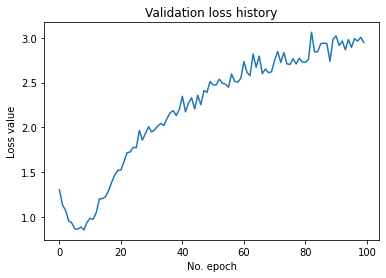

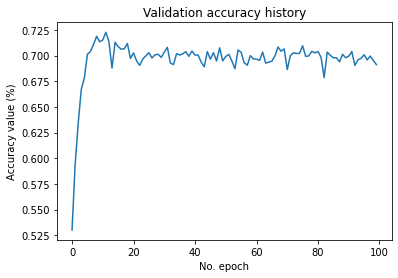

In [17]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [18]:
score = model.evaluate(test_images, test_label_fine, verbose=0)

ValueError: Data cardinality is ambiguous:
  x sizes: 32
  y sizes: 10000
Make sure all arrays contain the same number of samples.